##What are the characteristics of users who convert (behavioural and demographic)

In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC

In [162]:
df = pd.read_csv('/Users/youziya/Downloads/conversion_data.csv')

In [163]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [192]:
df

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,33,23,46,57,4,5,5,4,6,1
1,2,South America,organic,F,2,5,0,1,5,1.31,...,28,39,24,51,5,6,7,6,2,0
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,26,43,22,39,3,4,7,7,1,0
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Europe,organic,F,3,0,0,4,2,4.80,...,22,51,44,29,5,1,5,7,7,0
1996,1997,South America,google,M,1,2,0,4,1,1.34,...,54,33,59,38,1,6,6,7,6,0
1997,1998,Asia,facebook,M,2,3,0,0,8,2.56,...,32,30,48,38,2,1,7,6,4,0
1998,1999,South America,youtube,F,2,2,2,5,5,4.49,...,21,51,41,56,6,4,2,2,3,1


In [165]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


Data cleaning
There are no missing data. There is no null value observed and no duplicates observed. 
There is one wrong data type, I converted the converted_Fri from object type to int type.
There are no outliers. I used the boxplot and histogram to draw graphs. Then calcualted the skeness and kurtosis. As there are many columns, I used z score to drop outliers. After dropping the outliers, the df.info remain unchanged which means most data are normally distrubuted.
From the analysis above, we can note that exclude the visitor_location, marketing_channel, and gender column, all other columns are not object values. 
We can furthure divided these columns into numerical columns and categroical columns.
categorical values: product views, pages visited, converted_Fri
numerical values: avg_rating, avg_price, time_on_site
objects but will be categorical values: location, marketing channel, and gender


In [188]:
# this column is not necessary for analysing
df.drop(['Unnamed: 0'], axis=1, inplace=True) = df2
df2.columns

KeyError: "['Unnamed: 0'] not found in axis"

In [167]:
#no columns have null value
df.isnull().sum()

visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

In [190]:
df2['converted_Fri'] = df2['converted_Fri'].astype(int)


Unnamed: 0             int64
visitor_id             int64
visitor_location      object
marketing_channel     object
gender                object
product_views_Mon      int64
product_views_Tue      int64
product_views_Wed      int64
product_views_Thu      int64
product_views_Fri      int64
avg_rating_Mon       float64
avg_rating_Tue       float64
avg_rating_Wed       float64
avg_rating_Thu       float64
avg_rating_Fri       float64
avg_price_Mon        float64
avg_price_Tue        float64
avg_price_Wed        float64
avg_price_Thu        float64
avg_price_Fri        float64
time_on_site_Mon       int64
time_on_site_Tue       int64
time_on_site_Wed       int64
time_on_site_Thu       int64
time_on_site_Fri       int64
pages_visited_Mon      int64
pages_visited_Tue      int64
pages_visited_Wed      int64
pages_visited_Thu      int64
pages_visited_Fri      int64
converted_Fri          int64
dtype: object
      Unnamed: 0  visitor_id visitor_location marketing_channel gender  \
0            

In [191]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   0 non-null      object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [168]:
import pandas as pd

try:
    df2 = pd.read_csv("/Users/youziya/Downloads/conversion_data.csv")  # Replace with your actual data file
except Exception as e:
    print("Error loading data:", e)

if df2 is not None:
    duplicate_rows = df2.duplicated(subset=df2.columns)
    print(df2[duplicate_rows])
    df2_cleaned = df2[~duplicate_rows]
    print(df2_cleaned)

Empty DataFrame
Columns: [Unnamed: 0, visitor_id, visitor_location, marketing_channel, gender, product_views_Mon, product_views_Tue, product_views_Wed, product_views_Thu, product_views_Fri, avg_rating_Mon, avg_rating_Tue, avg_rating_Wed, avg_rating_Thu, avg_rating_Fri, avg_price_Mon, avg_price_Tue, avg_price_Wed, avg_price_Thu, avg_price_Fri, time_on_site_Mon, time_on_site_Tue, time_on_site_Wed, time_on_site_Thu, time_on_site_Fri, pages_visited_Mon, pages_visited_Tue, pages_visited_Wed, pages_visited_Thu, pages_visited_Fri, converted_Fri]
Index: []

[0 rows x 31 columns]
      Unnamed: 0  visitor_id visitor_location marketing_channel gender  \
0              0           1    North America           youtube      M   
1              1           2    South America           organic      F   
2              2           3        Australia         instagram      M   
3              3           4    North America          facebook      M   
4              4           5             Asia       

In [169]:
duplicate_rows = df2.duplicated(subset=df2.columns)

In [170]:
num_duplicate_rows = duplicate_rows.sum() 
num_duplicate_rows

0

In [186]:
df2.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [172]:
numerical_columns = ['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri']

#'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri'

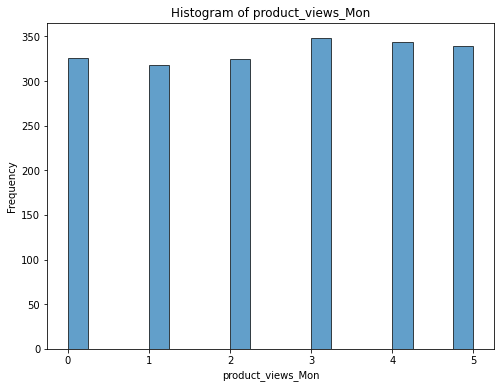

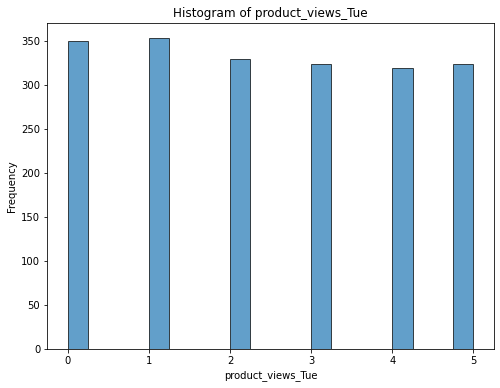

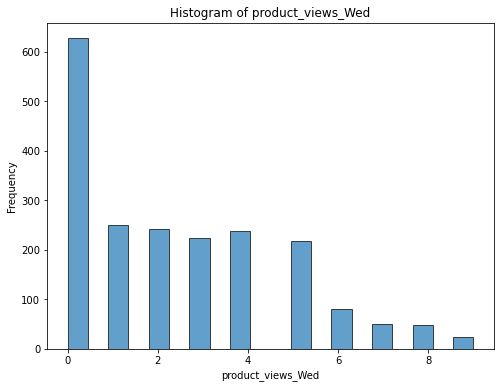

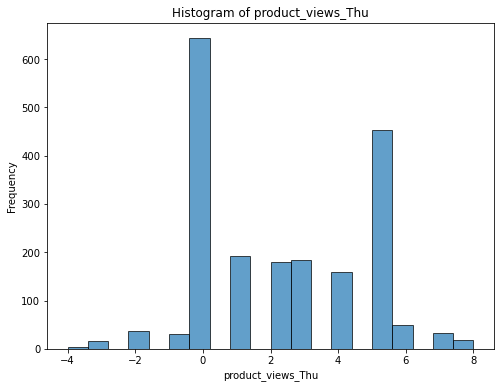

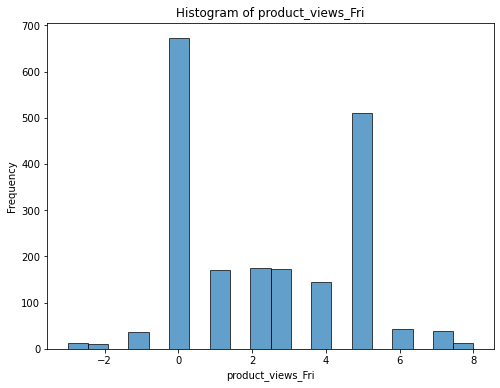

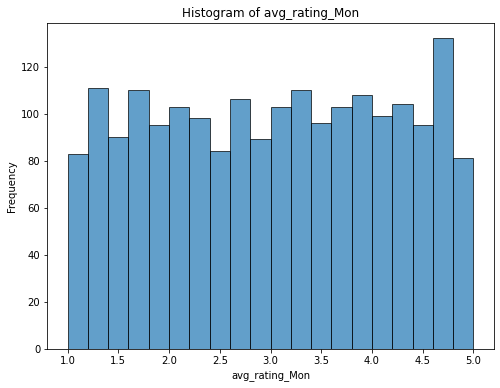

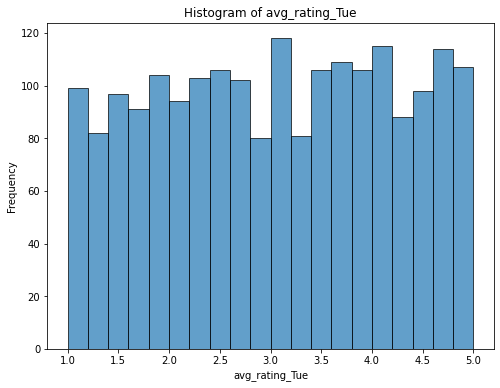

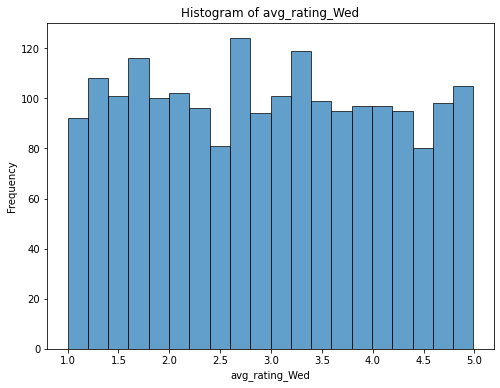

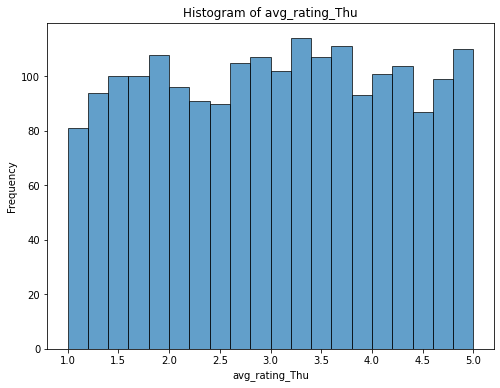

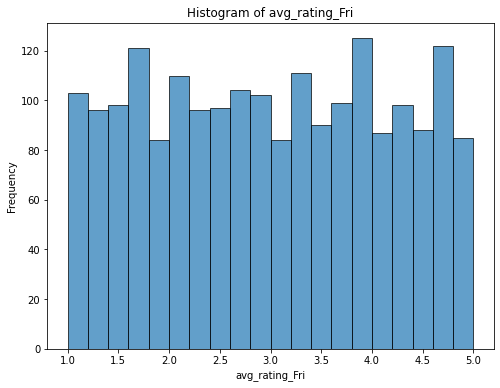

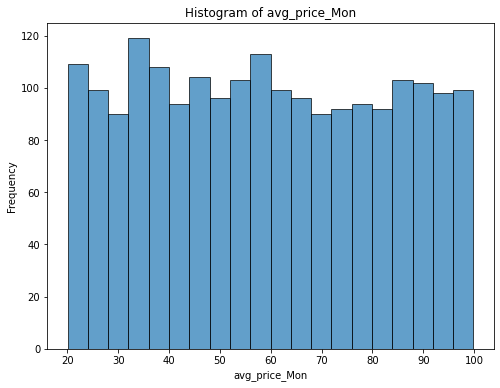

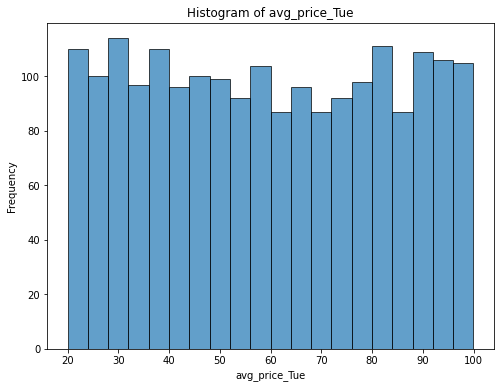

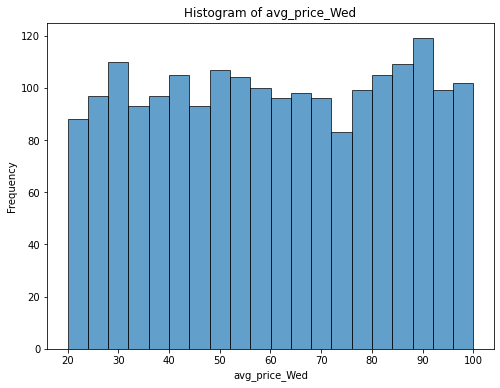

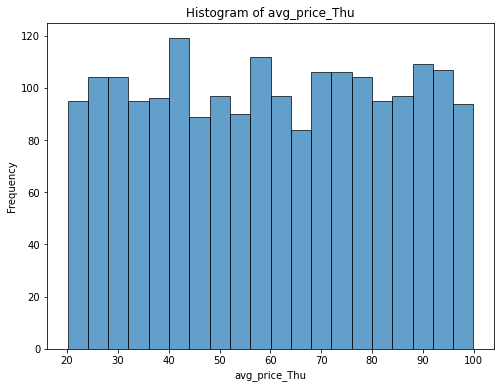

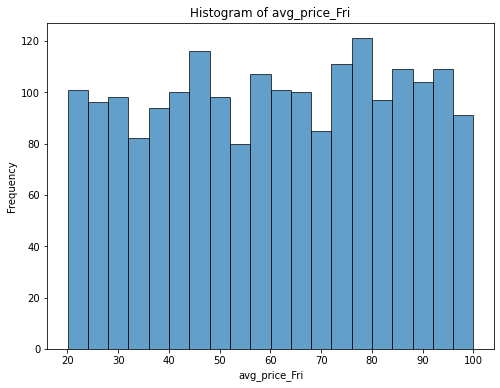

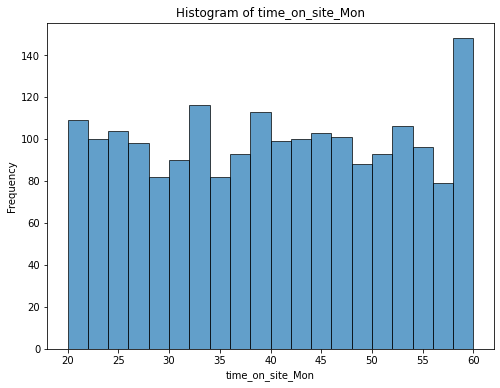

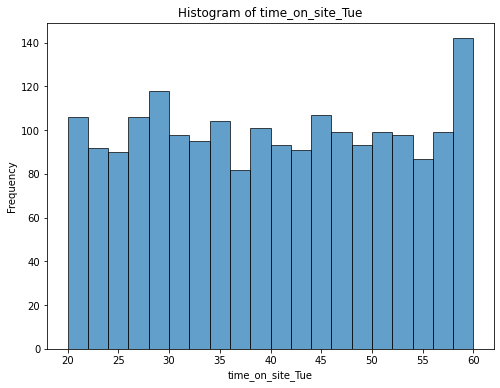

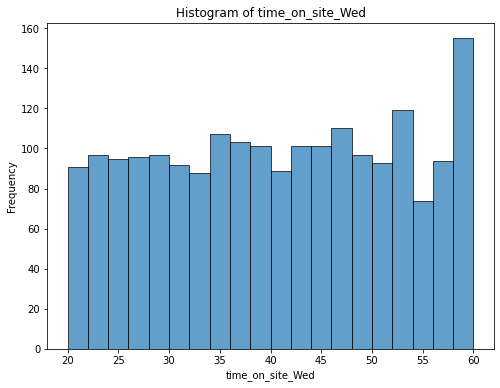

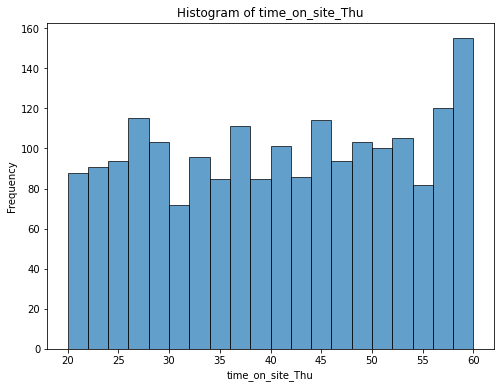

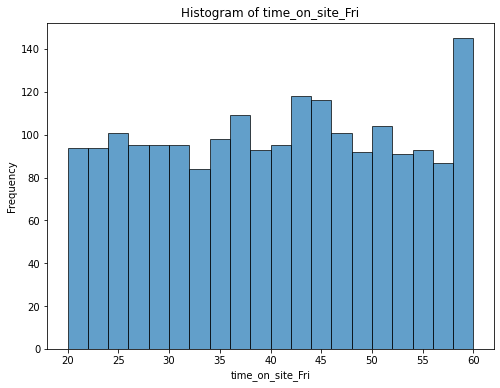

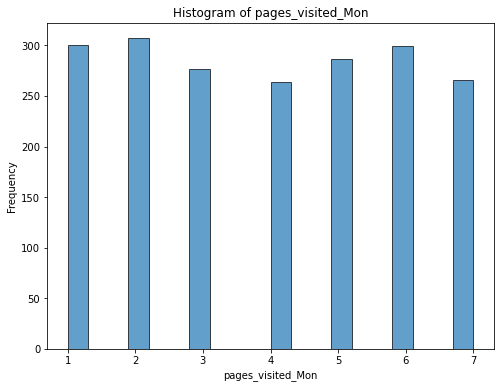

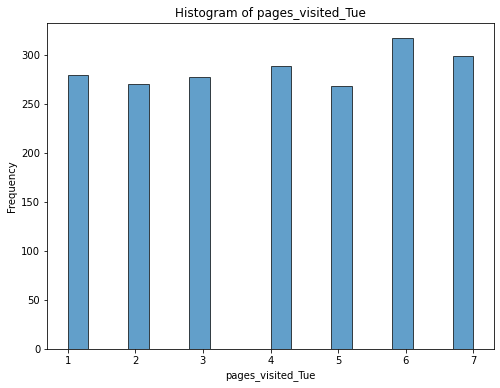

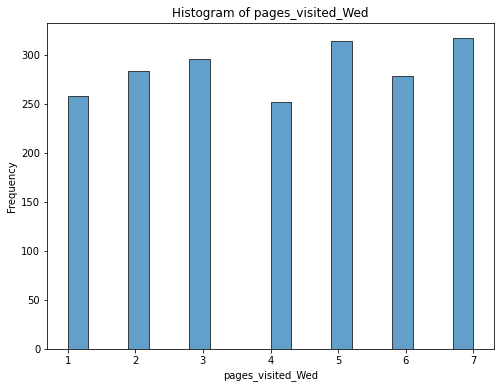

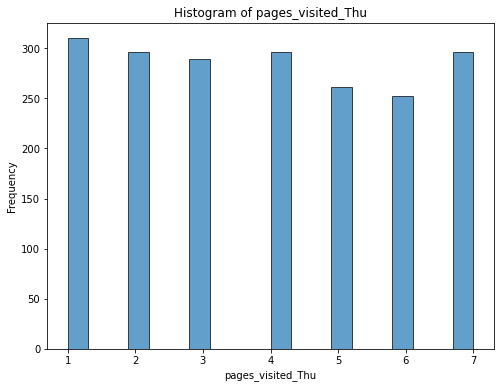

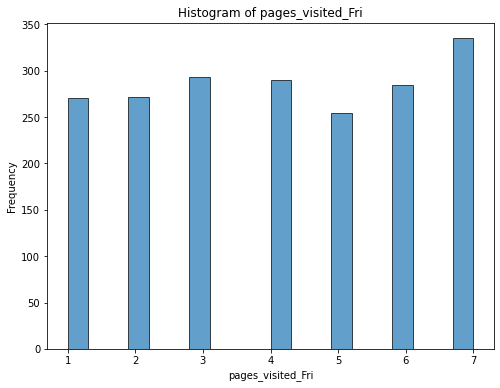

In [173]:
# plot the histogram for each numerical columns

num_bins = 20

for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
    plt.hist(df2[column], bins=num_bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#for product views
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='product_views_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='product_views_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='product_views_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='product_views_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='product_views_Fri', data=df2, ax=ax5)


In [ ]:
#for average rating
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='avg_rating_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_rating_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_rating_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_rating_Fri', data=df2, ax=ax5)

      

In [ ]:
#for average price
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='avg_price_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_price_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_price_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_price_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_price_Fri', data=df2, ax=ax5)

In [ ]:
#for product views
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='time_on_site_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='time_on_site_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='time_on_site_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='time_on_site_Fri', data=df2, ax=ax5)


In [ ]:
#for product views
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='pages_visited_Mon', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='pages_visited_Tue',data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='pages_visited_Wed', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Thu',data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited_Fri', data=df2, ax=ax5)


In [ ]:
df_anaemia = df.groupby(['DEATH_EVENT','anaemia'])[['sex']].count().unstack()
df_anaemia['total'] = df_anaemia['sex'][0] + df_anaemia['sex'][1]
df_anaemia['percent_0'] = df_anaemia['sex'][0] / df_anaemia['total']
df_anaemia['percent_1'] = df_anaemia['sex'][1] / df_anaemia['total']
df_anaemia

In [174]:
# calcualte skeness to better drop outliers
for column in numerical_columns:
    skewness_values = []
    s = skew(df2[column])
    k = kurtosis(df2[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

product_views_Mon: skewness = -0.04339723992227179, kurtosis = -1.2595334694359583
product_views_Tue: skewness = 0.05239895534857225, kurtosis = -1.278349926686584
product_views_Wed: skewness = 0.7078649532941341, kurtosis = -0.35422487943281133
product_views_Thu: skewness = 0.18508333245295, kurtosis = -1.019154529926297
product_views_Fri: skewness = 0.19578852072874067, kurtosis = -1.230292770208432
avg_rating_Mon: skewness = -0.036569401570234646, kurtosis = -1.2192260019428236
avg_rating_Tue: skewness = -0.04306188757167769, kurtosis = -1.192970789047595
avg_rating_Wed: skewness = 0.04108520953174745, kurtosis = -1.175952222375065
avg_rating_Thu: skewness = -0.021059652207191585, kurtosis = -1.1665255431135517
avg_rating_Fri: skewness = 0.0011903008781474437, kurtosis = -1.2093578638463074
avg_price_Mon: skewness = 0.04475490871743474, kurtosis = -1.2066916544930508
avg_price_Tue: skewness = 0.02480764664794289, kurtosis = -1.2566830578426142
avg_price_Wed: skewness = -0.0111900869

In [175]:
#as there are too many numerical columns, use z socre to remove outliers
if abs(s) > 1:
        df2[column] = df2[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df2[numerical_columns])
threshold = 3
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

didn't drop any outliers as these columns are normally distributed as you can see on the graph and through skewness. the df2 info number remain the same

In [176]:
#didn't drop any outliers as these columns are normally distributed as you can see on the graph and through skewness
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [177]:
descriptive_stats = df2.describe()
print(descriptive_stats)

        Unnamed: 0   visitor_id  product_views_Mon  product_views_Tue  \
count  2000.000000  2000.000000        2000.000000        2000.000000   
mean    999.500000  1000.500000           2.541500           2.440500   
std     577.494589   577.494589           1.704914           1.715206   
min       0.000000     1.000000           0.000000           0.000000   
25%     499.750000   500.750000           1.000000           1.000000   
50%     999.500000  1000.500000           3.000000           2.000000   
75%    1499.250000  1500.250000           4.000000           4.000000   
max    1999.000000  2000.000000           5.000000           5.000000   

       product_views_Wed  product_views_Thu  product_views_Fri  \
count        2000.000000        2000.000000        2000.000000   
mean            2.441000           2.256500           2.354000   
std             2.343345           2.370974           2.335682   
min             0.000000          -4.000000          -3.000000   
25%         

Feature enginnering to convert object into dummy variables

In [178]:
df2['visitor_location'].unique()

array(['North America', 'South America', 'Australia', 'Asia', 'Europe'],
      dtype=object)

In [179]:
location_mapping = {1:'North America', 2:'South America', 3:'Australia', 4:'Asia', 5:'Europe'}
df2['visitor_location'] = df2['visitor_location'].map(location_mapping)

In [180]:
location_dummies = pd.get_dummies(df2['visitor_location'], dtype=int)

In [181]:
location_dummies.head()

""
0
1
2
3
4


In [182]:
df2 = pd.concat([df2,location_dummies], axis=1)

In [185]:
df2.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,NaN,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,NaN,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,NaN,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,NaN,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,NaN,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [184]:
season

NameError: name 'season' is not defined

In [ ]:
df2['marketing_channel'].unique()

array(['youtube', 'organic', 'instagram', 'facebook', 'google'],
      dtype=object)

In [ ]:
season_dummies.head()

In [ ]:
channel_mapping = {1:'youtube', 2:'organic', 3:'instagram', 4:'facebook', 5:'google'}
df2['marketing_channel'] = df2['marketing_channel'].map(channel_mapping)

In [ ]:
location_dummies = pd.get_dummies(df2['visitor_location'], dtype=int)

In [ ]:
channel_dummies = pd.get_dummies(df2['marketing_channel'], dtype=int)

In [ ]:
gender_dummies = pd.get_dummies(df2['gender'], dtype=int)

In [ ]:
location_dummies.head()

""
0
1
2
3
4


In [ ]:
df2 = pd.concat([df2,location_dummies], axis=1)

In [ ]:
df2 = pd.concat([df2,channel_dummies], axis=1)

In [ ]:
df2 = pd.concat([df2,gender_dummies], axis=1)

drop these three object columns as I already created dummy variables for them, also remaining columns are all numberical, dropping these \
three object columns help with furthur analysis
df2.drop(['visitor_location', 'marketing_channel', 'gender'], axis=1, inplace=True)

In [ ]:
df2.head()

,Unnamed: 0,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,...,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,F,M
0,0,1,4,5,2,1,2,3.90,2.19,4.87,...,46,57,4,5,5,4,6,1,0,1
1,1,2,2,5,0,1,5,1.31,2.16,1.98,...,24,51,5,6,7,6,2,0,1,0
2,2,3,3,4,0,-3,5,3.26,4.79,3.12,...,34,31,1,3,3,2,3,1,0,1
3,3,4,1,0,0,5,0,2.66,4.79,3.41,...,22,39,3,4,7,7,1,0,0,1
4,4,5,1,5,2,2,3,2.76,2.38,3.32,...,47,57,6,6,5,2,4,1,1,0


In [ ]:
df2.columns

Index(['Unnamed: 0', 'visitor_id', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri', 'F', 'M'],
      dtype='object')

In [ ]:
df2.groupby('visitor_location').describe()

In [ ]:
df.groupby(['Gender','Converted_Fir'])['ID'].count().unstack()

In [ ]:
df.groupby(['_location','Segmentation'])['ID'].count().unstack()

In [ ]:
df.groupby(['Graduated','Segmentation'])['ID'].count().unstack()

In [ ]:
for i in ['Gender', 'Ever_Married','Graduated', 'Profession','Spending_Score']:
    print(df.groupby([i,'Segmentation'])['ID'].count().unstack())

In [ ]:
df['Converted_Fir'].unique()

In [ ]:
df[df['Segmentation']=='D'].describe(include='all')

In [ ]:
gender = pd.get_dummies(df['Gender'], dtype=int )

In [ ]:
Ever_Married = pd.get_dummies(df['Ever_Married'], dtype=int)
Ever_Married.rename(columns={'Yes':"Married", "No":'Not_Married'})
Graduated = pd.get_dummies(df['Graduated'], dtype=int)
Graduated.rename(columns={"Yes":"Graduated", "No":"Not_Graduated"})
Profession = pd.get_dummies(df['Profession'], dtype=int)

In [ ]:
new_df = pd.concat([df[['Age','Work_Experience','Family_Size']],gender,Ever_Married, Graduated, Profession, Spending_score, df['Segmentation']], axis=1)

In [ ]:
new_df.dropna(inplace=True)

In [ ]:
new_df.columns

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(np.array(new_df.iloc[:,:21]), np.array(new_df.iloc[:,21]))

In [ ]:
pred = knn.predict(np.array(new_df.iloc[:,:21]))

In [ ]:
print(accuracy_score(pred, new_df.iloc[:,21]))
print(f1_score(pred, new_df.iloc[:,21]))
print(recall_score(pred, new_df.iloc[:,21]))
print(precision_score(pred, new_df.iloc[:,21]))

In [ ]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(new_df.iloc[:,:21]), np.array(new_df.iloc[:,21]), test_size=0.2, random_state=123)

In [ ]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

In [ ]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [ ]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

In [ ]:
pred_l_prob = log.predict_proba(X_test)


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
gmeans = np.sqrt(tpr*(1-fpr))
gmeans

In [ ]:
thresholds[np.argmax(gmeans)]

In [ ]:
knn_params = {'n_neighbors':range(50,300)}

rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=10, cv=5, scoring='f1')
rs_knn.fit(X_train,y_train)
rs_knn.best_estimator_

In [ ]:
svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=5, scoring='f1')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_

In [ ]:
svc_best = SVC(kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=72)

svc_best.fit(X_train,y_train)
knn_best.fit(X_train,y_train)

pred_svc_best = svc_best.predict(X_test)
pred_knn_best = knn_best.predict(X_test)

print(f1_score(pred_svc_best, y_test))
print(f1_score(pred_knn_best, y_test))

In [ ]:
print(f1_score(pred_l, y_test))
